## Ford-Bike Data Visualization Report 
by **Mashael AlKhalifa**

### Investigation Overview
In this investigation, I'll be taking a look at the bay Area bike share system users and their behaviour, the average trip duration, and the daily usage of the system.



### Dataset
It is a dataset for public use it and contains information about trips duration, trips starting and ending stations,...etc. in this document, I will explore and visualize this dataset.

The dataset includes 14 feature

>- Start station id 
- Start station name
- Start station latitude
- Start station longitude
- End station id
- End station name
- End station latitude
- End station longitude
- Trip duration (sec)
- Start time
- End time 
- User type (Customer/Subscriber)
- Bike share for all trips (Yes/No)
- Bike id


In [ ]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [ ]:
# load the dataset
df_clean = pd.read_csv('Bikes-data.csv')

### The member age who use the GoBike. 
#### The data is not distributed evenly. There are many bikers are around age 32. There are not that many bikers above age 40.

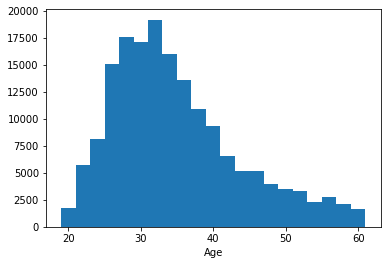

In [36]:
min_age = df_clean['age'].min()
max_age = df_clean['age'].max()
bins = np.arange(min_age, max_age+2, 2)
plt.hist(data = df_clean, x = 'age', bins = bins);
plt.xlabel('Age')
plt.show()

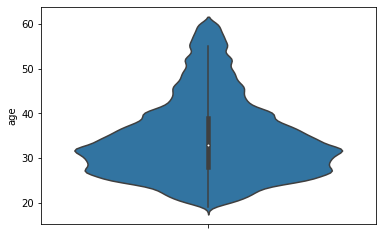

In [37]:
sns.violinplot(data = df_clean, y = 'age')

### The average duration of trip in minutes.
**We can see the distribution of how long these bikes are used by people within minutes.**
-  The distribution looks closer to normal distribution. we can see that The majority of the trips take less than 10 minutes. 

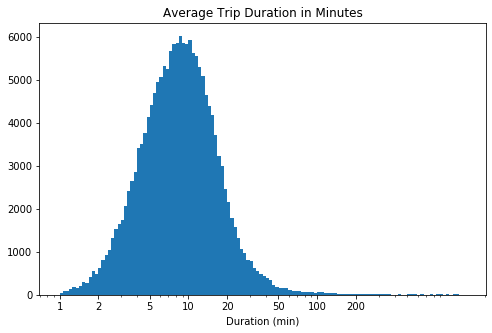

In [51]:
log_binsize = 0.025
bins = 10 ** np.arange(0, np.log10(df_clean['duration_minute'].max())+log_binsize, log_binsize)

plt.figure(figsize=[8, 5]);
plt.hist(data = df_clean, x = 'duration_minute', bins = bins);
plt.xscale('log');
plt.xticks([1, 2, 5, 10, 20, 50, 100, 200], [1, 2, 5, 10, 20, 50, 100, 200]);
plt.title('Average Trip Duration in Minutes')
plt.xlabel('Duration (min)');
plt.show()

## Distribution of Ford GoBike System users

> There are three types of gender using the Fork GoBike system, the male,female and other. It was found that (Male) **74.4%**, The (Female) **23.5%** and (Other) **2.1%**.
Also, there are two types of users using the Fork GoBike System, subscribers who are members of the program, and customers, who are usually occasional riders or tourists. It was found that (subscriber) make **90.5%** of all system customers, **9.5%** of them were casual riders (Customer).
Also, 

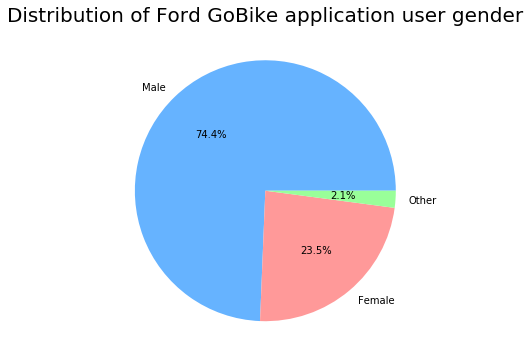

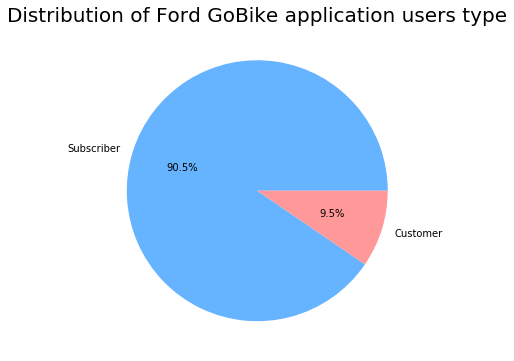

In [53]:
figsize = (16,6)
#creating a list of colors to use
colors = ['#66b3ff','#ff9999','#99ff99']

# for user_gender
gender_dist=df_clean['member_gender'].value_counts()
#setting the plot axes and plotting the data
plt.subplots(figsize=figsize)
gender_dist.plot(kind='pie' , autopct='%1.1f%%' , colors=colors)
#setting the plot's title
plt.title('Distribution of Ford GoBike application user gender' , fontsize = 20)
# To ignore show the name of field  member_gender
plt.ylabel('')
plt.show()

# for user_type
sorted_counts_type = df_clean['user_type'].value_counts()
#setting the plot axes and plotting the data
plt.subplots(figsize=figsize);
sorted_counts_type.plot(kind='pie' , autopct='%1.1f%%' , colors=colors)
#setting the plot's title
plt.title('Distribution of Ford GoBike application users type' , fontsize = 20)
# To ignore show the name of field user_type
plt.ylabel('')
plt.show()

### Average Trip Duration(min) per day for Month
The duration of the trips wasn't consistent. 28 day had the longest trip, while 3,9 and 13 had the shortest trips.

In [45]:
# Let's anaylsis the distrbution of how long users take a trip given everyday - for month
df_clean_by_days = df_clean.groupby('start_date').sum().reset_index()
df_clean_by_days['start_date'] = df_clean_by_days['start_date'].dt.strftime('%Y-%m-%d')

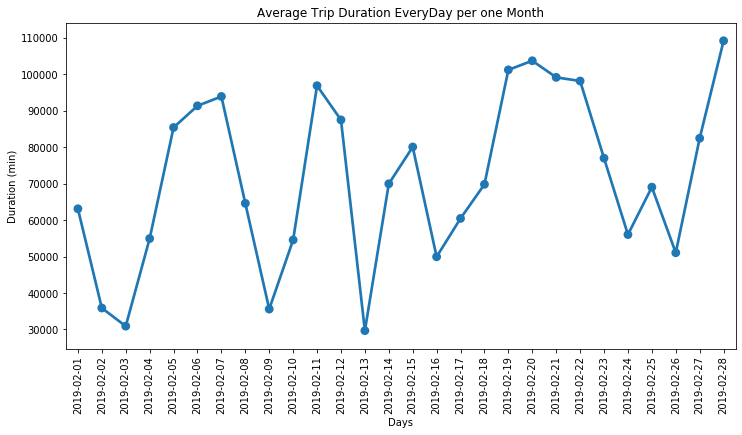

In [46]:
plt.figure(figsize = [12, 6])

sns.pointplot(data = df_clean_by_days, x = df_clean_by_days['start_date'], y = df_clean_by_days['duration_minute'])
plt.title('Average Trip Duration EveryDay per one Month')
plt.xlabel('Days')
plt.ylabel('Duration (min)')
plt.xticks(rotation = 90)
plt.show()

### Long Trip Duration by Member Age and Gender
>It is surprising that number of long trip duration for customers whose ages between 25 and 35 is approximately the same of the number of long trip duration for subscribers whose in the same age although the number of subscribers is much greater than the number of cutomers.
The plots below shows that the trips with high duration are mostly taken by males who's age between 25 and 35.


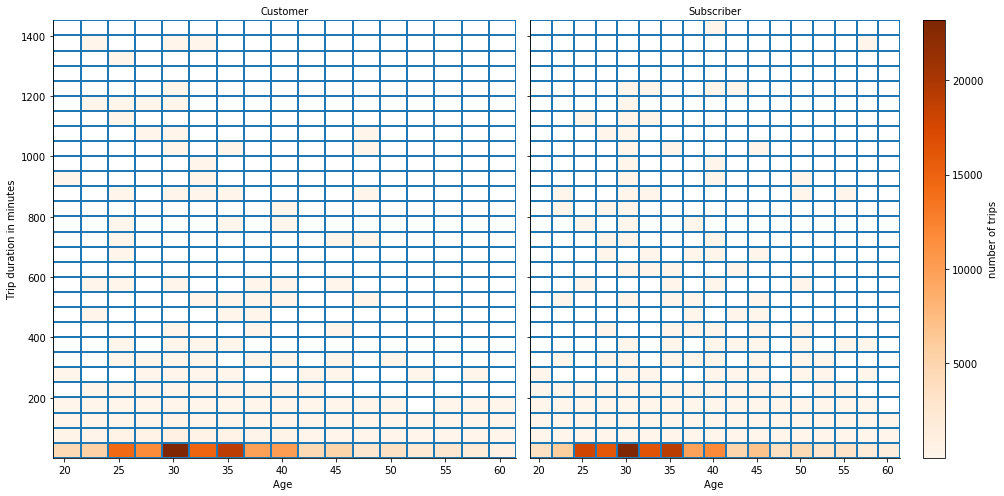

In [47]:
bins_x = np.arange(df_clean.age.min(), df_clean.age.max()+2.5, 2.5)
bins_y = np.arange(df_clean.duration_minute.min(), df_clean.duration_minute.max()+50, 50)

g = sns.FacetGrid(data = df_clean, col = 'user_type', height = 7, col_wrap = 2)
g.map(plt.hist2d, 'age', 'duration_minute',cmin=0.5,bins = [bins_x, bins_y], cmap='Oranges')

g.set_ylabels('Trip duration in minutes')
g.set_xlabels('Age ')
g.set_titles('{col_name}')


plt.colorbar(label = 'number of trips')
plt.show()

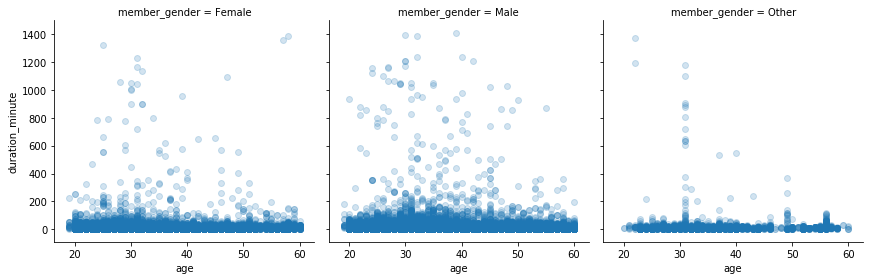

In [48]:
g = sns.FacetGrid(data = df_clean, col = 'member_gender', height = 4,col_wrap = 4)
g.map(plt.scatter, 'age', 'duration_minute',alpha=1/5)
plt.show()

### The highest biker counts on days.
Thursday day at 8:00 & 17:00 hours have the highest biker counts on days number 8 & 17, 24 hours.

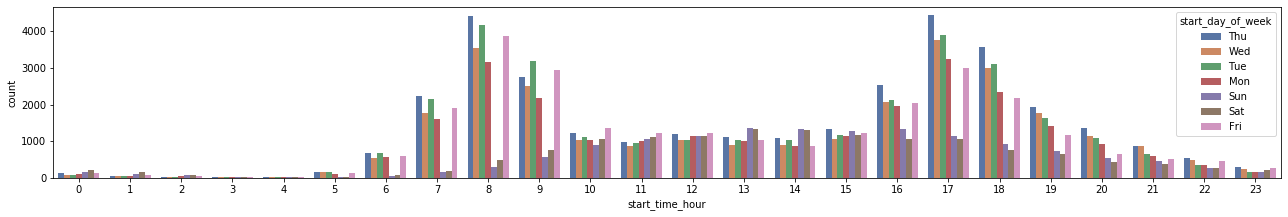

In [61]:
plt.figure(figsize = [22, 22])

ncol = 2
loc = 1
plt.subplot(6, 1, 3)
sns.countplot(data = df_clean, x = 'start_time_hour', hue = 'start_day_of_week', palette = 'deep')
plt.show()